# Integration: Tracking and Checking



In [50]:
%%time

import pandas as pd
import os

from autodeploy.check import tools
from autodeploy.setup import Setup, Executor, Tracker, Workflow
from autodeploy.run import Run
from autodeploy.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-eng/'

# Simulate new requests from user
df_input = pd.read_csv(os.path.join(app_dir, 'workflow', 'X_test.csv'))
df_noise = tools.add_noise(df_input, sigma=0.003) # Predictions drawn from drafted distribution
# df_noise = df_input
df_noise.to_csv(os.path.join(app_dir, 'workflow', 'new_data.csv'), index=False)

# Workflows

executors3 = [Executor(name='get_new_data', 
                       file='get_new_data.py',
                       parameters={'new_data_path': 'new_data.csv'},
                       env='gathering'),
              Executor(name='preprocessing_new_data', 
                       file='preprocessing_new_data.py',
                       parameters={'output_data': 'preprocessed_data.csv'},
                       env='preprocessing')]
# Sequential
workflow3 = Workflow(name='workflow3', 
                     executors=executors3,
                     tracker=Tracker(port=8003))



# Build and run environments (containers)
# workflow_dataeng = Setup(app_dir, workflows_eng, verbose=False)
workflow_dataeng = Setup(app_dir, workflows=[workflow3],
                             verbose=False)
workflow_dataeng.run_pipeline()

# Read the workflows and run them
runner_eng = Run(workflow_dataeng, verbose=True)
runner_eng.run_workflows()

# Make predictions
deployer_eng = Deploy(app_dir, verbose=True)
predictions = deployer_eng.predict('preprocessed_data.csv', port=5001)

predictions.head()

17-Feb-20 18:56:21 -  INFO - [++] Running workflow: [workflow3].
17-Feb-20 18:56:21 -  INFO - [+] Running env: [workflow3:get_new_data].
17-Feb-20 18:56:22 -  INFO - [+] Running (get_new_data.py). 
17-Feb-20 18:56:22 -  INFO - [+] Output:     eccentricity  aspect_ratio  elongation  ...  third_moment  uniformity   entropy
0      0.996578     10.117178    0.923501  ...      0.009906   -0.000657  0.268753
1      0.502897      1.127799    0.667347  ...     -0.002239   -0.001249  0.673164
2      0.246826      1.045486    0.605449  ...      0.008038   -0.003775  0.832151
3      0.866596      1.881113    0.619778  ...      0.000714    0.003207  1.013414
4      0.829096      1.983564    0.510748  ...      0.009300   -0.000753  1.803267

[5 rows x 14 columns]
 
17-Feb-20 18:56:22 -  INFO - [+] Environment (get_new_data) finished successfully. 
17-Feb-20 18:56:22 -  INFO - [+] Running env: [workflow3:preprocessing_new_data].
17-Feb-20 18:56:24 -  INFO - [+] Running (preprocessing_new_data.py). 


CPU times: user 104 ms, sys: 4.17 ms, total: 109 ms
Wall time: 3.65 s


,eccentricity,aspect_ratio,elongation,solidity,stochastic_convexity,isoperimetric_factor,maximal_indentation_depth,lobedness,average_intensity,average_contrast,smoothness,third_moment,uniformity,entropy,pred
0,0.996578,10.117178,0.923501,0.801704,0.905071,0.148698,0.126652,2.735557,0.005994,0.053007,0.003839,0.009906,-0.000657,0.268753,31
1,0.502897,1.127799,0.667347,0.530320,0.758889,0.164364,0.133536,3.079681,0.016463,0.058098,0.001342,-0.002239,-0.001249,0.673164,11
2,0.246826,1.045486,0.605449,0.563450,0.794716,0.218452,0.127962,2.856961,0.038368,0.127432,0.012957,0.008038,-0.003775,0.832151,11
3,0.866596,1.881113,0.619778,0.821123,0.855898,0.326836,0.038531,0.401456,0.043604,0.117118,0.013358,0.000714,0.003207,1.013414,5
4,0.829096,1.983564,0.510748,0.943895,0.996243,0.560025,0.024567,0.119420,0.081749,0.167004,0.030836,0.009300,-0.000753,1.803267,12


In [6]:
workflow_datascience.workflows_user

[{'name': 'workflow1',
  'workflow': [{'name': 'gathering',
    'file': 'gathering.py',
    'parameters': {'raw_data_path': 'leaf.csv', 'percentage': 0.05},
    'dockerfile': 'Dockerfile_gathering'},
   {'name': 'preprocessing',
    'file': 'preprocessing.py',
    'requirements': 'req_preprocessing.txt'}],
  'tracker': {'port': 8001}}]

In [3]:
import json
import os
from autodeploy import tools

def save_workflows(app_dir)
    meta_dir = tools.get_autodeploy_paths(app_dir)['ad_meta_dir']

    workflows_metadata_name = 'workflows.json'
    workflows_metadata_path = os.path.join(meta_dir, workflows_metadata_name)

    with open(workflows_metadata_path, 'w') as fout:
        json.dump(workflow_datascience.workflows, fout)


## TODO: change dictionaries for function 

from autodeploy.setup import setup, 
(e.g, node(params), workflow(name, nodes))

In [6]:
# from autodeploy.setup import Setup2, Executor, Tracker, Workflow
# from autodeploy.run import Run

# # App folder
# app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-science/'

# executors = [Executor(name='gathering', 
#                       file='gathering.py',
#                       parameters={'raw_data_path': 'leaf.csv',
#                                     'percentage': 1.0}),
#             Executor(name='preprocessing', 
#                      file='preprocessing.py',
#                      requirements='req_preprocessing.txt')]

# tracker = Tracker(port=8001)

# workflow = Workflow(name='workflow1', 
#                     executors=executors,
#                     tracker=tracker)

# setup_datascience = Setup2(app_dir, workflows=[workflow], verbose=False)

# # This will build and start the environments
# setup_datascience.run_pipeline()

# # Read the platform and workflows
# runner = Run(setup_datascience, verbose=True)

# # Run the workflow
# runner.run_workflows()

In [3]:
setup_datascience.workflows_user

[{'name': 'workflow1',
  'executors': [{'name': 'gathering',
    'file': 'gathering.py',
    'parameters': {'raw_data_path': 'leaf.csv', 'percentage': 1.0}},
   {'name': 'preprocessing',
    'file': 'preprocessing.py',
    'requirements': 'req_preprocessing.txt'}],
  'tracker': {'port': 8001}}]

In [5]:
workflow.to_dict

{'name': 'workflow1',
 'executors': [{'name': 'gathering',
   'file': 'gathering.py',
   'parameters': {'raw_data_path': 'leaf.csv', 'percentage': 1.0}},
  {'name': 'preprocessing',
   'file': 'preprocessing.py',
   'requirements': 'req_preprocessing.txt'}],
 'tracker': {'port': 8001}}

In [15]:
for wf in workflows:
    print(wf.params.keys())
    for wflow in wf.params['workflow']:
        pass
#         print(wflow.params)

dict_keys(['self', 'name', 'workflow', 'tracker'])


## TODO: check permission when tracking (check executor nodes)

In [2]:
import os
import shutil

def remove_tracker_history(name='workflow1'):
    tracker_dir = get_tracker_dir(name='workflow1')
    dir_to_remove = os.path.join(tracker_dir, 'mlruns')
    print(dir_to_remove)
    shutil.rmtree(tracker_dir)
    
# remove_tracker_history(name='workflow1')    

In [78]:
!ls /home/guess/Desktop/autodeploy/examples/demo2/data-science/ad-stuff/ad-tracker/tracker-workflow1

mlruns


In [26]:
mlflow.get_tracking_uri()

'file://home/guess/Desktop/autodeploy/examples/demo2/data-science/ad-stuff/ad-tracker/tracker-workflow1'

## Integration

In [16]:
get_tracker_dir(name='workflow1')

'/home/guess/Desktop/autodeploy/examples/demo2/data-science/ad-stuff/ad-tracker/tracker-workflow1'

In [53]:
%%time

import mlflow

def search_by_key(key, var):
    if hasattr(var,'items'):
        for k, v in var.items():
            if k == key:    
                yield v
            if isinstance(v, dict):
                for result in search_by_key(key, v):
                    yield result
            elif isinstance(v, list):
                for d in v:
                    for result in search_by_key(key, d):
                        yield result

                        
# tracker_dirs = [next(search_by_key('tracker_dir', e)) for e in workflow_datascience.workflows]
# tracker_dirs

def get_tracker_dir(name='workflow1'):
    tracker_dirs = [next(search_by_key('tracker_dir', e)) for e in workflow_dataeng.workflows ]
    
    tracker_wflow_dir = [tdir for tdir in tracker_dirs if name in tdir]
    
    if len(tracker_wflow_dir) == 0:
        return None
    else:
        return tracker_wflow_dir[0]

# get_tracker_dir(name='workflow1')

def get_tracked_values(name='workflow1', verbose=True, **args):
    """
        This function will provide all the tracked values for each workflow.
        
        For search syntax see: https://www.mlflow.org/docs/latest/search-syntax.html
    """
    tracker_dir = get_tracker_dir(name)
    if tracker_dir is not None:
        tracker_uri = f'file://{tracker_dir}/mlruns/'
        mlflow.set_tracking_uri(tracker_uri)
        df = mlflow.search_runs(['0'], **args)
        if verbose:
            return df
        else:
            not_cols = ['run_id', 'experiment_id', 'status',
             'artifact_uri', 'tags.mlflow.source.type',
             'tags.mlflow.user']

            return df[df.columns.difference(not_cols)]
    else:
        return None

df = get_tracked_values(name='workflow3', verbose=True)
# df = get_tracked_values(name='workflow1',filter_string="params.n_samples='340'" )

df.head()
# tracker_dir = 'file:///home/guess/Desktop/autodeploy/examples/demo2/data-science/ad-stuff/ad-tracker/tracker-workflow1/mlruns/'
# # tracker_url = 'http://localhost:8001/'
# # mlflow.set_tracking_uri(tracker_url)
# mlflow.set_tracking_uri(tracker_dir)


# mlflow.get_tracking_uri()



CPU times: user 222 ms, sys: 7.88 ms, total: 230 ms
Wall time: 233 ms


,run_id,experiment_id,status,artifact_uri,params.n_samples,params.problem_type,params.n_features,params.dtypes,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.runName
0,353fe42d4ddc43368b53389312504837,0,FINISHED,/mlflow/mlruns/0/353fe42d4ddc43368b53389312504...,68,classification,14,"{'eccentricity': 'float64', 'aspect_ratio': 'f...",LOCAL,preprocessing_new_data.py,root,preprocessing
1,a92ea0a1f9244f0e9d998c523c0f04a1,0,FINISHED,/mlflow/mlruns/0/a92ea0a1f9244f0e9d998c523c0f0...,None,None,None,None,LOCAL,get_new_data.py,root,get_new_data
2,2591e813d61647e2a4f2a41e1b274a0f,0,FINISHED,/mlflow/mlruns/0/2591e813d61647e2a4f2a41e1b274...,68,classification,14,"{'eccentricity': 'float64', 'aspect_ratio': 'f...",LOCAL,preprocessing_new_data.py,root,preprocessing
3,b0bfe68ea6254deb8339aa5db26317aa,0,FINISHED,/mlflow/mlruns/0/b0bfe68ea6254deb8339aa5db2631...,None,None,None,None,LOCAL,get_new_data.py,root,get_new_data
4,2cfdee8e2c814d2da6129177baadd02a,0,FINISHED,/mlflow/mlruns/0/2cfdee8e2c814d2da6129177baadd...,68,classification,14,"{'eccentricity': 'float64', 'aspect_ratio': 'f...",LOCAL,preprocessing_new_data.py,root,preprocessing


In [63]:
df.artifact_uri.values

array(['/mlflow/mlruns/0/353fe42d4ddc43368b53389312504837/artifacts',
       '/mlflow/mlruns/0/a92ea0a1f9244f0e9d998c523c0f04a1/artifacts',
       '/mlflow/mlruns/0/2591e813d61647e2a4f2a41e1b274a0f/artifacts',
       '/mlflow/mlruns/0/b0bfe68ea6254deb8339aa5db26317aa/artifacts',
       '/mlflow/mlruns/0/2cfdee8e2c814d2da6129177baadd02a/artifacts',
       '/mlflow/mlruns/0/cc9bd0b1fa09444088d57e66a060aa25/artifacts',
       '/mlflow/mlruns/0/2f23901f316a4f77a3091be020edb7fa/artifacts',
       '/mlflow/mlruns/0/de2b8c7ea9ec401fad617bd6a0a291a4/artifacts',
       '/mlflow/mlruns/0/ac905b7bfad34be393e8b72ee9295d67/artifacts',
       '/mlflow/mlruns/0/4d38b32eea36401da436eb855295588d/artifacts',
       '/mlflow/mlruns/0/c40bd7402890441f8de3ec663453354d/artifacts',
       '/mlflow/mlruns/0/1a750fcd3859484291f705f3663084d2/artifacts',
       '/mlflow/mlruns/0/452122c564234e0d8b232b39540ee360/artifacts',
       '/mlflow/mlruns/0/138f53b1d9874f05a438a7d128754592/artifacts',
       '/mlflow/mlru

In [ ]:
def list_artifacts()

In [55]:
tracker_dir = get_tracker_dir(name='workflow3')
tracker_uri = f'file://{tracker_dir}/mlruns/'
print(tracker_uri)
tracker = mlflow.tracking.MlflowClient(tracking_uri=tracker_uri)

tracker.tracking_uri

file:///home/guess/Desktop/autodeploy/examples/demo2/data-eng/ad-stuff/ad-tracker/tracker-workflow3/mlruns/


'file:///home/guess/Desktop/autodeploy/examples/demo2/data-eng/ad-stuff/ad-tracker/tracker-workflow3/mlruns/'

In [59]:
run = tracker.get_run('353fe42d4ddc43368b53389312504837')
run

<Run: data=<RunData: metrics={}, params={'dtypes': "{'eccentricity': 'float64', 'aspect_ratio': 'float64', "
           "'elongation': 'float64', 'solidity': 'float64', "
           "'stochastic_convexity': 'float64', 'isoperimetric_factor': "
           "'float64', 'maximal_indentation_depth': 'float64', 'lobedness': "
           "'float64', 'average_intensity': 'float64', 'average_contrast': "
           "'float64', 'smoothness': 'float64', 'third_moment': 'float64', "
           "'uniformity': 'float64', 'entropy': 'float64'}",
 'n_features': '14',
 'n_samples': '68',
 'problem_type': 'classification'}, tags={'mlflow.runName': 'preprocessing',
 'mlflow.source.name': 'preprocessing_new_data.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'root'}>, info=<RunInfo: artifact_uri='/mlflow/mlruns/0/353fe42d4ddc43368b53389312504837/artifacts', end_time=1581962184136, experiment_id='0', lifecycle_stage='active', run_id='353fe42d4ddc43368b53389312504837', run_uuid='353fe42d4ddc43368b5338

In [60]:
tracker.list_artifacts('353fe42d4ddc43368b53389312504837')

[]

In [62]:
# %%time

# tracker.get_metric_history('353fe42d4ddc43368b53389312504837', 'n_features')

In [6]:
tracker.list_artifacts('b0bfe68ea6254deb8339aa5db26317aa')

[]

In [9]:
df.artifact_uri.values

array(['/mlflow/mlruns/0/c40bd7402890441f8de3ec663453354d/artifacts',
       '/mlflow/mlruns/0/1a750fcd3859484291f705f3663084d2/artifacts',
       '/mlflow/mlruns/0/452122c564234e0d8b232b39540ee360/artifacts',
       '/mlflow/mlruns/0/138f53b1d9874f05a438a7d128754592/artifacts',
       '/mlflow/mlruns/0/21692565c56748bc8035e0334d4528fc/artifacts',
       '/mlflow/mlruns/0/e0b6183af3ce44429922ab78d32ea0d6/artifacts',
       '/mlflow/mlruns/0/33472d875c184413ba55a9e997527b49/artifacts',
       '/mlflow/mlruns/0/b96b0b045b02458f9c2e53ee5c372173/artifacts'],
      dtype=object)

In [4]:
mlflow.get_artifact_uri()

'/mlflow/mlruns/0/77c50e98ecb74569afc6507576483134/artifacts'

In [3]:
import matplotlib.pyplot as plt
from autodeploy.check import Checker

app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-eng/'
# checker = Checker(app_dir, workflow_dataeng)
checker = Checker(app_dir)

df = checker.get_tracked_values(name='workflow3')
df

# def custom_gathering_checker():
#     df = checker.get_tracked_values(name='workflow1')
    
#     plt.title('gathering')
#     df_values = df[df['tags.mlflow.runName']=='gathering']['params.n_rows_raw'].dropna().astype(int)
#     df_values.plot(kind='hist');
#     plt.ylabel('Number of rows')
#     flag = any(df_values.values < 100)
#     if flag:
#         print(f"Alert!: few rows:{df_values[df_values.values < 100].values}")
    
# custom_gathering_checker()

,end_time,params.dtypes,params.n_features,params.n_samples,params.problem_type,start_time,tags.mlflow.runName,tags.mlflow.source.name
0,2020-02-15 16:33:50.445000+00:00,"{'eccentricity': 'float64', 'aspect_ratio': 'f...",14,68,classification,2020-02-15 16:33:50.287000+00:00,preprocessing,preprocessing_new_data.py
1,2020-02-15 16:33:48.777000+00:00,None,None,None,None,2020-02-15 16:33:48.633000+00:00,get_new_data,get_new_data.py


Alert!: few rows:[51 34]


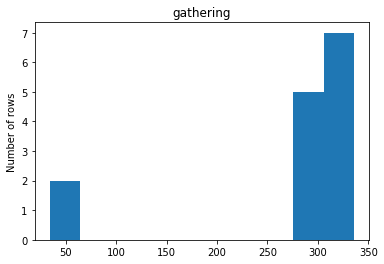

In [92]:
import matplotlib.pyplot as plt

def custom_gathering_checker():
    df = get_tracked_values(name='workflow1')
    
    plt.title('gathering')
    df_values = df[df['tags.mlflow.runName']=='gathering']['params.n_rows_raw'].dropna().astype(int)
    df_values.plot(kind='hist');
    plt.ylabel('Number of rows')
    flag = any(df_values.values < 100)
    if flag:
        print(f"Alert!: few rows:{df_values[df_values.values < 100].values}")
    
custom_gathering_checker()

In [104]:
df['params.n_rows_raw'].dropna().head().kurtosis()

4.932866538132455

In [112]:
def custom_explain_histogram():
    df = get_tracked_values(name='workflow1')
    
    df_num = df[df['tags.mlflow.runName']=='gathering']['params.n_rows_raw'].dropna().astype(int)
#     df_num = self.data[self.num_features]

    kurtosis_list = df_num.kurtosis()
    if kurtosis_list > 0.5:
        print('It is not normal. Be aware')
    else:
        print('It seems ok')


    return kurtosis_list

custom_explain_histogram()

It is not normal. Be aware


0.8698703977031998

In [34]:
# cols_params = [col for col in df.columns if 'params' in col]

# df['params'] = df[cols_params].values
# df.head()

In [36]:
not_cols = ['run_id', 'experiment_id', 'status',
             'artifact_uri', 'tags.mlflow.source.type',
             'tags.mlflow.user']

df[df.columns.difference(not_cols)].head()

,end_time,params.dtypes,params.n_classes,params.n_features,params.n_samples,params.problem_type,start_time,tags.mlflow.runName,tags.mlflow.source.name
0,2020-02-11 09:57:37.051000+00:00,"{'species': 'int64', 'eccentricity': 'float64'...",30,14,340,classification,2020-02-11 09:57:36.849000+00:00,preprocessing,preprocessing.py
1,2020-02-11 09:57:35.266000+00:00,None,None,None,None,None,2020-02-11 09:57:35.125000+00:00,gathering,gathering.py
2,2020-02-10 17:14:02.616000+00:00,"{'species': 'int64', 'eccentricity': 'float64'...",30,14,340,classification,2020-02-10 17:14:02.396000+00:00,preprocessing,preprocessing.py
3,2020-02-10 17:14:01.144000+00:00,None,None,None,None,None,2020-02-10 17:14:01.019000+00:00,gathering,gathering.py
4,2020-02-10 17:02:49.268000+00:00,"{'species': 'int64', 'eccentricity': 'float64'...",30,14,340,classification,2020-02-10 17:02:49.059000+00:00,preprocessing,preprocessing.py


In [40]:
mlflow.set_tracking_uri()

<module 'pandas' from '/home/guess/Desktop/autodeploy/venv/lib/python3.7/site-packages/pandas/__init__.py'>

In [35]:
%%time

df = mlflow.search_runs(['0'])
df.head()

CPU times: user 1.76 s, sys: 0 ns, total: 1.76 s
Wall time: 1.91 s


,run_id,experiment_id,status,artifact_uri,start_time,end_time,params.problem_type,params.dtypes,params.n_features,params.n_samples,params.n_classes,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.user
0,67c1eda16c124bb39f0f2675fb5a74b8,0,FINISHED,/mlflow/mlruns/0/67c1eda16c124bb39f0f2675fb5a7...,2020-02-11 09:57:36.849000+00:00,2020-02-11 09:57:37.051000+00:00,classification,"{'species': 'int64', 'eccentricity': 'float64'...",14,340,30,preprocessing.py,preprocessing,LOCAL,root
1,3c7bce383f6a4bd680ec5650cbc616a0,0,FINISHED,/mlflow/mlruns/0/3c7bce383f6a4bd680ec5650cbc61...,2020-02-11 09:57:35.125000+00:00,2020-02-11 09:57:35.266000+00:00,None,None,None,None,None,gathering.py,gathering,LOCAL,root
2,1b2034360698445e9059815c51adb8e0,0,FINISHED,/mlflow/mlruns/0/1b2034360698445e9059815c51adb...,2020-02-10 17:14:02.396000+00:00,2020-02-10 17:14:02.616000+00:00,classification,"{'species': 'int64', 'eccentricity': 'float64'...",14,340,30,preprocessing.py,preprocessing,LOCAL,root
3,f5c502dba45d446fba298dacafc5ff34,0,FINISHED,/mlflow/mlruns/0/f5c502dba45d446fba298dacafc5f...,2020-02-10 17:14:01.019000+00:00,2020-02-10 17:14:01.144000+00:00,None,None,None,None,None,gathering.py,gathering,LOCAL,root
4,a358a7d780b44c929eb6808e83a134a8,0,FINISHED,/mlflow/mlruns/0/a358a7d780b44c929eb6808e83a13...,2020-02-10 17:02:49.059000+00:00,2020-02-10 17:02:49.268000+00:00,classification,"{'species': 'int64', 'eccentricity': 'float64'...",14,340,30,preprocessing.py,preprocessing,LOCAL,root


In [42]:
df.columns

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'params.n_samples', 'params.dtypes', 'params.problem_type',
       'params.n_classes', 'params.n_features', 'tags.mlflow.source.name',
       'tags.mlflow.user', 'tags.mlflow.source.type', 'tags.mlflow.runName'],
      dtype='object')

In [38]:
%%time

mlflow.search_runs(['0'], filter_string="params.n_samples='340'")

CPU times: user 1.28 s, sys: 31.9 ms, total: 1.31 s
Wall time: 1.32 s


,run_id,experiment_id,status,artifact_uri,start_time,end_time,params.n_samples,params.dtypes,params.problem_type,params.n_classes,params.n_features,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName
0,903537480a20428c8f3db6415073640d,0,FINISHED,/mlflow/mlruns/0/903537480a20428c8f3db64150736...,2020-02-10 15:03:46.372000+00:00,2020-02-10 15:03:46.567000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing
1,45de995a2b164b849a607141183b2ebd,0,FINISHED,/mlflow/mlruns/0/45de995a2b164b849a607141183b2...,2020-02-10 14:40:35.386000+00:00,2020-02-10 14:40:35.569000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing
2,ca307b899cc04602940fbfdd63f87347,0,FINISHED,/mlflow/mlruns/0/ca307b899cc04602940fbfdd63f87...,2020-02-10 14:40:13.409000+00:00,2020-02-10 14:40:13.605000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing
3,3ce8bbdab818492e9f98f4c809a59931,0,FINISHED,/mlflow/mlruns/0/3ce8bbdab818492e9f98f4c809a59...,2020-02-10 14:37:52.589000+00:00,2020-02-10 14:37:52.771000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing
4,ca53a5a7edc44f0ab8887a6b96416a69,0,FINISHED,/mlflow/mlruns/0/ca53a5a7edc44f0ab8887a6b96416...,2020-02-10 14:34:41.670000+00:00,2020-02-10 14:34:41.848000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing
5,33c317b4f57c4723a62e09ffa4f4144e,0,FINISHED,/mlflow/mlruns/0/33c317b4f57c4723a62e09ffa4f41...,2020-02-10 14:33:55.126000+00:00,2020-02-10 14:33:55.352000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing
6,1ecae350b4fe436589085ef3d904f4c5,0,FINISHED,/mlflow/mlruns/0/1ecae350b4fe436589085ef3d904f...,2020-02-10 13:40:30.713000+00:00,2020-02-10 13:40:30.892000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing
7,fa1356116a9e44fb9373a8a4c090a84e,0,FINISHED,/mlflow/mlruns/0/fa1356116a9e44fb9373a8a4c090a...,2020-02-10 13:27:17.660000+00:00,2020-02-10 13:27:17.853000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing
8,3ef2319a6eed444dad547f65ce9fe1e3,0,FINISHED,/mlflow/mlruns/0/3ef2319a6eed444dad547f65ce9fe...,2020-02-10 13:24:14.908000+00:00,2020-02-10 13:24:15.227000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing
9,7d21583b6b9747fa8730bbcca9dab9cb,0,FINISHED,/mlflow/mlruns/0/7d21583b6b9747fa8730bbcca9dab...,2020-02-04 14:16:17.724000+00:00,2020-02-04 14:16:17.904000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing


In [28]:
%%time

mlflow.search_runs(['0'], max_results=2)

CPU times: user 6.5 ms, sys: 3.81 ms, total: 10.3 ms
Wall time: 1.95 s


,run_id,experiment_id,status,artifact_uri,start_time,end_time,params.n_samples,params.dtypes,params.problem_type,params.n_classes,params.n_features,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName
0,903537480a20428c8f3db6415073640d,0,FINISHED,/mlflow/mlruns/0/903537480a20428c8f3db64150736...,2020-02-10 15:03:46.372000+00:00,2020-02-10 15:03:46.567000+00:00,340,"{'species': 'int64', 'eccentricity': 'float64'...",classification,30,14,preprocessing.py,root,LOCAL,preprocessing
1,158c9bb018bb4d44b924b345d2b6aa39,0,FINISHED,/mlflow/mlruns/0/158c9bb018bb4d44b924b345d2b6a...,2020-02-10 15:03:44.829000+00:00,2020-02-10 15:03:44.950000+00:00,None,None,None,None,None,gathering.py,root,LOCAL,gathering


# Checker

########## Comparing two numerical dataframes ##########

######## Kolmogorov-Smirnov test ########


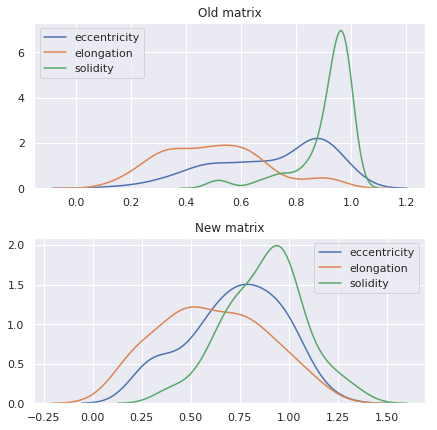

23-Jan-20 18:24:08 -  INFO - [+] Checker for file: [/home/guess/Desktop/autodeploy/examples/demo2/data-eng/ad-stuff/ad-checker/predictions/input_predictions_2020_01_23_18_03_35.csv] was run successfully.


               eccentricity   elongation    solidity
p_value            0.252956  7.89089e-05  0.00042029
explain  Slightly different    Different   Different


In [1]:
import pandas as pd
import os 
from autodeploy.check import check, tools

app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-eng/'
checker = check.Checker(app_dir, verbose=True)


X_old = pd.read_csv(os.path.join(app_dir, 'workflow', 'X_train.csv'))
# X_new = predictions.loc[:, predictions.columns != 'pred']

cols = ['eccentricity', 'elongation', 'solidity']

checker.run_checker(X_old,cols=cols,
                    checker_type='statistical', verbose=True,)



In [5]:
X_old.shape

(272, 14)

In [39]:
# %%timeit -n 1000

os.chdir(checker.ad_checker_dir)
input_pred_files = sorted(filter(os.path.isfile, 
              os.listdir(checker.ad_checker_dir)), 
              key=os.path.getmtime, reverse=True)
input_pred_files

['input_predictions_2020_01_20_14_19_54.csv',
 'input_predictions_2020_01_20_14_19_48.csv',
 'input_predictions_2020_01_20_14_11_26.csv',
 'input_predictions_2020_01_20_12_01_52.csv',
 'input_predictions_2020_01_20_10_18_57.csv',
 'input_predictions_2020_01_20_10_14_40.csv']

In [13]:
date_file = os.path.basename(df_files[0]).replace('input_predictions_', '').replace('.csv', '')
date_file = datetime.strptime(date_file, '%Y_%m_%d_%H_%M_%S')
date_file

datetime.datetime(2020, 1, 20, 10, 18, 57)

In [12]:
datetime.strptime(date_file, '%Y_%m_%d_%H_%M_%S')

datetime.datetime(2020, 1, 20, 10, 18, 57)

In [11]:
df_test.index = pd.date_range(now, freq="0.1ms", periods=len(df_test))
df_test

,eccentricity,aspect_ratio,elongation,solidity,stochastic_convexity,isoperimetric_factor,maximal_indentation_depth,lobedness,average_intensity,average_contrast,smoothness,third_moment,uniformity,entropy,pred
2020-01-17 10:41:08.283529,1.066012,1.920511,0.722149,0.979833,0.983299,0.683092,0.226578,-0.125905,-0.042419,0.065223,0.037547,-0.123127,0.067392,1.252862,11
2020-01-17 10:41:08.283629,0.476330,1.077887,0.610741,0.648986,0.630181,0.041997,0.086020,3.554588,-0.037133,0.251853,0.018282,-0.198643,-0.145084,0.903017,22
2020-01-17 10:41:08.283729,0.718719,1.572540,0.369638,1.027375,1.168818,0.797696,-0.168437,-0.094557,0.021924,0.108053,-0.061511,-0.078119,-0.031951,0.697594,7
2020-01-17 10:41:08.283829,0.783435,1.728566,0.481026,0.972497,1.123270,0.665887,0.063736,-0.058424,0.043039,-0.032219,0.187309,-0.049022,-0.035740,1.279174,7
2020-01-17 10:41:08.283929,0.858434,2.559860,0.624057,1.139838,0.979369,0.467872,0.012888,-0.036693,0.079064,0.203257,-0.081375,0.058055,0.090289,1.776303,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-17 10:41:08.310229,0.609097,1.184257,0.482800,1.100568,0.857339,0.482913,0.102299,1.496951,-0.087603,0.112414,-0.026292,-0.293101,-0.137302,0.322667,23
2020-01-17 10:41:08.310329,0.984182,5.997470,0.797370,1.199569,0.942120,0.158638,0.076527,0.393715,-0.036615,0.046034,-0.294113,-0.067568,0.177599,0.732421,8
2020-01-17 10:41:08.310429,0.484787,1.063242,0.334820,0.985518,1.047553,0.546129,-0.223697,0.673073,-0.020497,0.152000,0.180566,0.005404,-0.024271,1.951772,30
2020-01-17 10:41:08.310529,0.391194,1.205966,0.154423,1.096769,1.125514,0.795019,0.079830,-0.054729,0.096264,0.226298,0.051240,0.242836,0.061506,1.096508,10


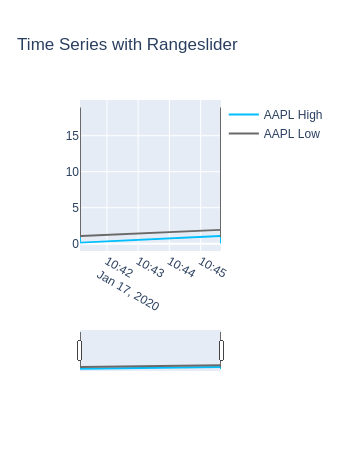

In [32]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_total.index, y=df_total['eccentricity'], name="AAPL High",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=df_total.index, y=df_total['aspect_ratio'], name="AAPL Low",
                         line_color='dimgray'))

fig.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
E_tr = E_full[E_full['Anomaly'].isnan()]

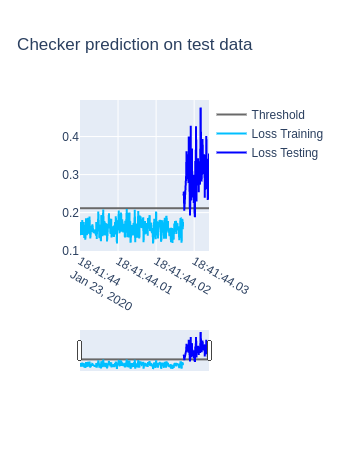

In [30]:
plot_predictions(E_full, E_test)

In [31]:
E_test.head()

,Loss_mae,Anomaly
2020-01-23 18:41:44.027200,0.244843,True
2020-01-23 18:41:44.027300,0.255335,True
2020-01-23 18:41:44.027400,0.204726,False
2020-01-23 18:41:44.027500,0.219309,True
2020-01-23 18:41:44.027600,0.262399,True


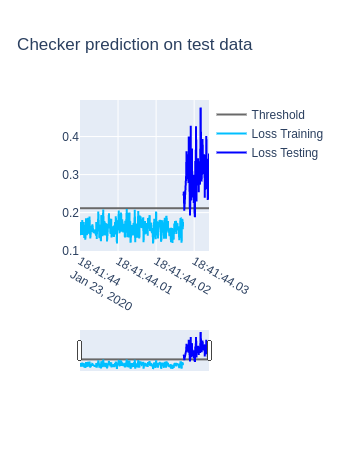

In [37]:
import plotly.graph_objects as go
import pandas as pd

# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

def plot_predictions(E_full, E_test):
    
    E_train = E_full[E_full['Anomaly'].isna()].copy()
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=E_full.index, y=E_full['Threshold'], name="Threshold",
                             line_color='dimgray'))
    fig.add_trace(go.Scatter(x=E_train.index, y=E_train['Loss_mae'], name="Loss Training",
                             line_color='deepskyblue'))

    if not any(E_test['Anomaly']):
        fig.add_trace(go.Scatter(x=E_test.index, y=E_test['Loss_mae'], name="Loss Testing",
                                 line_color='green'))
    else:   
        fig.add_trace(go.Scatter(x=E_test.index, y=E_test['Loss_mae'], name="Loss Testing",
                                 line_color='blue'))

    fig.update_layout(title_text='Checker prediction on test data',
                      xaxis_rangeslider_visible=True)
    fig.show()
    
plot_predictions(E_full, E_test)

In [39]:
cols = [c for c in list(df_test.columns) if c != 'pred']
cols

['eccentricity',
 'aspect_ratio',
 'elongation',
 'solidity',
 'stochastic_convexity',
 'isoperimetric_factor',
 'maximal_indentation_depth',
 'lobedness',
 'average_intensity',
 'average_contrast',
 'smoothness',
 'third_moment',
 'uniformity',
 'entropy']

In [1]:
# import plotly.express as px
# # df = px.data.iris()
# fig = px.scatter_matrix(df_test, 
#                         dimensions=cols[8:], color="pred")
# fig.show()

In [34]:
import dash
import dash_core_components as dcc
import plotly.express as px
def dynamic_layout():
    df = px.data.tips() # could be a database query instead!
    return dcc.Graph(figure=px.bar(df, x="day", y="tip")
                            .update_yaxes(tickprefix="$")
                            .update_layout(legend_orientation="h"))
app = dash.Dash(__name__)
app.layout = dynamic_layout
app

## Autoencoder

Create train, val and test. train and val from X_old
test from new data (input_pred)

In [2]:
import pandas as pd
import os 
from autodeploy.check import check, tools
from sklearn.model_selection import train_test_split

app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-eng/'
checker = check.Checker(app_dir, verbose=True)


df_files = tools.get_input_predictions(checker.ad_paths['ad_checker_pred_dir'], 
                                       periods=1)

X_train = pd.read_csv(os.path.join(app_dir, 'workflow', 'X_train.csv'))
X_test = df_files[0]['data'].loc[:, df_files[0]['data'].columns != 'pred']

print(f'Train {X_train.shape}')
print(f'Test {X_test.shape}')

Train (272, 14)
Test (68, 14)


In [3]:
df_date = df_files[0]['date']
range_periods = X_train.shape[0] + X_test.shape[0]
concat_indexes = pd.date_range(df_date, freq="0.1ms", 
                               periods=range_periods)

X_train.index = concat_indexes[:len(X_train)]
X_test.index = concat_indexes[len(X_train):]
# df_test
X_train.head()

,eccentricity,aspect_ratio,elongation,solidity,stochastic_convexity,isoperimetric_factor,maximal_indentation_depth,lobedness,average_intensity,average_contrast,smoothness,third_moment,uniformity,entropy
2020-01-23 18:41:44.000000,0.87163,2.0659,0.55339,0.94868,1.00000,0.60231,0.031671,0.182550,0.049706,0.134400,0.017742,0.006692,0.000161,1.40160
2020-01-23 18:41:44.000100,0.39092,1.0870,0.68174,0.50961,0.66140,0.15361,0.140820,3.609300,0.028638,0.089135,0.007882,0.002118,0.000210,0.90082
2020-01-23 18:41:44.000200,0.77982,1.6215,0.39222,0.98512,0.99825,0.80816,0.005099,0.004731,0.024875,0.089686,0.007979,0.002466,0.000147,0.66975
2020-01-23 18:41:44.000300,0.73281,1.5437,0.36231,0.98616,1.00000,0.79359,0.005259,0.005034,0.046731,0.120300,0.014265,0.004156,0.000264,1.26810
2020-01-23 18:41:44.000400,0.92535,2.8030,0.65133,0.97600,1.00000,0.48413,0.015435,0.043360,0.098946,0.183380,0.032533,0.009180,0.001330,1.80330


In [10]:
# import plotly.graph_objects as go
# import pandas as pd

# # df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

# fig = go.Figure()

# # for col in df_train.columns:
# for col in cols:
#     fig.add_trace(go.Scatter(x=df_train.index,
#                              y=df_train[col],
#                              name=col))

    
# # fig.add_trace(go.Scatter(x=df_train.index, y=df_train['eccentricity'], name="AAPL High",
# #                          line_color='deepskyblue'))

# # fig.add_trace(go.Scatter(x=df_train.index, y=df_train['aspect_ratio'], name="AAPL Low",
# #                          line_color='dimgray'))

# fig.update_layout(title_text='Time Series with Rangeslider',
#                   xaxis_rangeslider_visible=True)
# fig.show()

In [11]:
# import plotly.graph_objects as go
# import pandas as pd

# # df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

# fig = go.Figure()

# # for col in df_train.columns:
# for col in cols:
#     fig.add_trace(go.Scatter(x=df_test.index,
#                              y=df_test[col],
#                              name=col))

    
# # fig.add_trace(go.Scatter(x=df_train.index, y=df_train['eccentricity'], name="AAPL High",
# #                          line_color='deepskyblue'))

# # fig.add_trace(go.Scatter(x=df_train.index, y=df_train['aspect_ratio'], name="AAPL Low",
# #                          line_color='dimgray'))

# fig.update_layout(title_text='Time Series with Rangeslider',
#                   xaxis_rangeslider_visible=True)
# fig.show()

In [5]:
import os
import math
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt



# from tensorflow.keras import backend
from sklearn import preprocessing
from numpy.random import seed
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.compat.v1 import set_random_seed

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dropout, Dense, Activation 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import regularizers
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping


In [11]:
class Encoder(layers.Layer):
    def __init__(self,
                 intermediate_dim1,
                 intermediate_dim2,
                 latent_dim,
                 name='Encoder',
                 **kwargs):
        super(Encoder, self).__init__(name=name, **kwargs)
        self.dense1 = Dense(units=intermediate_dim1, activation='elu')
        self.dense2 = Dense(units=intermediate_dim2, activation='elu')
        self.dense_latent = Dense(units=latent_dim, activation='elu')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense_latent(x)

        return x


class Decoder(layers.Layer):
    def __init__(self,
                 intermediate_dim2,
                 intermediate_dim1,
                 original_dim,
                 name='Decoder',
                 **kwargs):
        super(Decoder, self).__init__(name=name, **kwargs)
        self.dense1 = Dense(units=intermediate_dim2, activation='elu')
        self.dense2 = Dense(units=intermediate_dim1, activation='elu')
        self.dense_output = Dense(units=original_dim, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense_output(x)

        return x


class DeepDenoiseAE(tf.keras.Model):
    def __init__(self,
                 original_dim,
                 intermediate_dim1,
                 intermediate_dim2,
                 latent_dim,
                 name='Deep_Denoise_AutoEncoder',
                 **kwargs):
        super(DeepDenoiseAE, self).__init__(name=name, **kwargs)
        self.original_dim = original_dim
        self.encoder = Encoder(intermediate_dim1,
                               intermediate_dim2,
                               latent_dim)
        self.decoder = Decoder(intermediate_dim2,
                               intermediate_dim1,
                               original_dim)

    def call(self, inputs):
        x_encoded = self.encoder(inputs)
        x_reconstructed = self.decoder(x_encoded)

        return x_reconstructed


In [10]:
# from sklearn.externals import joblib
import joblib
from sklearn.preprocessing import MinMaxScaler

def scale(scaler_dir, df):
    scaler_path = os.path.join(scaler_dir, 'scaler.save')
    
    if os.path.isfile(scaler_path):
        scaler = joblib.load(scaler_path) 
        X = pd.DataFrame(scaler.transform(df), 
                             columns=df.columns, 
                             index=df.index)
    else:
        scaler = MinMaxScaler()
        X = pd.DataFrame(scaler.fit_transform(df), 
                              columns=df.columns, 
                              index=df.index)
        joblib.dump(scaler, scaler_path) 
        
    return X

In [7]:
# checker.ad_paths['ad_checker_scaler_dir']
X_train = scale(checker.ad_paths['ad_checker_scaler_dir'], X_train)
X_test = scale(checker.ad_paths['ad_checker_scaler_dir'], X_test)
X_full = pd.concat([X_train, X_test], sort=False)
print(X_train.shape)

(272, 14)


In [42]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train = pd.DataFrame(scaler.fit_transform(df_train), 
#                               columns=df_train.columns, 
#                               index=df_train.index)
# # Random shuffle training data
# # X_train.sample(frac=1)

# X_test = pd.DataFrame(scaler.transform(df_test), 
#                              columns=df_test.columns, 
#                              index=df_test.index)

# X_full = pd.concat([X_train, X_test], sort=False)
# print(X_train.shape)

In [43]:
# ddae_history.history['loss']

In [12]:
import plotly.graph_objects as go
import pandas as pd

def plot_loss_history(history):


    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(len(history.history['loss']))),
                             y=history.history['loss'],
                             name='Training loss'))
    fig.add_trace(go.Scatter(x=list(range(len(history.history['val_loss']))),
                             y=history.history['val_loss'],
                             name='Validation loss'))


    fig.update_layout(title_text='Loss History',
                      xaxis_title="Epochs",
                      yaxis_title="Loss error",
                      xaxis_rangeslider_visible=True)
    fig.show()

In [13]:
def plot_training_error_distribution(loss_mae):
  plt.figure()
  sns.distplot(loss_mae,
              bins = 10, 
              kde= True,
              color = 'blue');
#   plt.xlim([0.0,.5])

In [46]:
# import plotly.figure_factory as ff
# import numpy as np
# import pandas as pd

# def plot_reconstruction_error(loss_mae):

#     fig = ff.create_distplot([loss_mae], ['Loss_mae'], bin_size=.25)
#     fig.show()
    
# plot_reconstruction_error(E_train['Loss_mae'])

In [14]:
# Plot error history of training of a model
def plot_training_error_history(h, ymin=0.1, ymax=0.2):
  plt.plot(h.history['loss'],
          'b',
          label='Training loss')
  plt.plot(h.history['val_loss'],
          'r',
          label='Validation loss')
  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.ylabel('Loss, [mse]')
#   plt.ylim([ymin, ymax])
  plt.show()

#
# Plot error distribution
def plot_training_error_distribution(loss_mae):
  plt.figure()
  sns.distplot(loss_mae,
              bins = 10, 
              kde= True,
              color = 'blue');
#   plt.xlim([0.0,.5])

In [15]:
seed(10)
# tf.set_random_seed(10)

# Create DD-AE model
def get_dd_ae(hidden_dim=10, input_dim=14, act_func = 'elu'):
  
  # Begin with the input shape
    input_sensors = Input(shape=(input_dim,))

    # Overcomplete the encoder (increase dimensionality)
    encoded = Dense(units=hidden_dim, activation=act_func)(input_sensors)
    encoded = Dense(units=hidden_dim-2, activation=act_func)(encoded)

    # Undercomplete the encoder (decrease dimensionality)
    encoded = Dense(units=4, activation=act_func)(encoded)

    # Ended up reducing the dimensionaly till reached the input's shape
    decoded = Dense(units=hidden_dim-2, activation=act_func)(encoded)
    decoded = Dense(units=hidden_dim, activation=act_func)(decoded)
    decoded = Dense(units=input_dim, activation='sigmoid')(decoded)

    # stack the layers
    autoencoder = Model(input_sensors, decoded)

    autoencoder.compile(optimizer='adadelta', 
                      loss='mse')
    autoencoder.summary()
  
    return autoencoder

#
# Prepare error distribution by building mean value on difference between predicted and real values
def get_ddae_loss(model, X):
    X_pred = model.predict(np.array(X))
    X_pred = pd.DataFrame(X_pred, 
                        columns=X.columns)
    X_pred.index = X.index

    E = pd.DataFrame(index=X.index)
    E['Loss_mae'] = np.mean(np.abs(X_pred-X), axis = 1)

    return E

In [18]:
def add_noise(X_train):
    X_train_noisy = X_train + np.random.normal(loc=0.0, scale=0.05, size=X_train.shape)
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)
    
    return X_train_noisy

X_train_noisy = add_noise(X_train)
print(X_train_noisy.shape)

In [14]:
X_train_noisy.head()

,eccentricity,aspect_ratio,elongation,solidity,stochastic_convexity,isoperimetric_factor,maximal_indentation_depth,lobedness,average_intensity,average_contrast,smoothness,third_moment,uniformity,entropy
2020-01-23 18:41:44.000000,0.771654,0.007303,0.430591,0.611173,0.732680,0.603815,0.375952,0.056875,0.437201,0.365846,0.389292,0.614806,0.418043,0.492155
2020-01-23 18:41:44.000100,0.359564,0.076122,0.573420,0.194824,0.307966,0.149016,0.583648,0.536036,0.474292,0.261152,0.501625,0.638458,0.448596,0.266862
2020-01-23 18:41:44.000200,0.591880,0.018832,0.436975,0.662958,0.761431,0.765259,0.358520,0.057989,0.508970,0.360442,0.502273,0.510443,0.611563,0.123312
2020-01-23 18:41:44.000300,0.627036,0.037367,0.360518,0.661214,0.640177,0.834864,0.412178,0.000000,0.440811,0.412640,0.558418,0.586778,0.536407,0.457257
2020-01-23 18:41:44.000400,0.709144,0.053905,0.675516,0.631896,0.658672,0.532449,0.336780,0.000000,0.533378,0.381551,0.559337,0.668142,0.470983,0.543094


In [94]:
# X_train_noisy = X_train + np.random.normal(loc=0.0, scale=0.05, size=X_train.shape)
# X_train_noisy = np.clip(X_train_noisy, 0., 1.)
# # X_test_noisy = X_test + np.random.normal(loc=0.0, scale=0.05, size=X_test.shape)
# # X_test_noisy = np.clip(X_test_noisy, 0., 1.)
# print(X_train_noisy.shape)
# # print(X_test_noisy.shape)

In [15]:
%%time

seed(10)
# set_random_seed(10)
# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=500
BATCH_SIZE=10
# ddae_model = get_dd_ae(act_func='elu')
ddae_model = DeepDenoiseAE(original_dim=X_train.shape[1], 
                           intermediate_dim1=10,
                           intermediate_dim2=8,
                           latent_dim=4)
ddae_model.compile(optimizer='adadelta', 
                      loss='mse')
ddae_history = ddae_model.fit(np.array(X_train_noisy), np.array(X_train),
                  # batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
#                   validation_data=(X_test_noisy, X_test),
                  verbose=0)

CPU times: user 5.73 s, sys: 153 ms, total: 5.88 s
Wall time: 4.75 s


In [19]:
def get_checker(X_train, X_test, ad_paths, date=None):
    np.random.seed(42)
    tf.random.set_seed(42)
    
    if date is not None:
        range_periods = X_train.shape[0] + X_test.shape[0]
        concat_indexes = pd.date_range(date, freq="0.1ms", 
                                       periods=range_periods)

        X_train.index = concat_indexes[:len(X_train)]
        X_test.index = concat_indexes[len(X_train):]
    
    X_train = scale(ad_paths['ad_checker_scaler_dir'], X_train)
    X_test = scale(ad_paths['ad_checker_scaler_dir'], X_test)
    X_full = pd.concat([X_train, X_test], sort=False) 
    
    X_train_noisy = add_noise(X_train)
    

    model_path = os.path.join(ad_paths['ad_checker_model_dir'], 'saved_model.pb')
    if os.path.isfile(model_path):
        ddae_model = tf.keras.models.load_model(ad_paths['ad_checker_model_dir'])
    else:
        NUM_EPOCHS=500
        BATCH_SIZE=32
        ddae_model = DeepDenoiseAE(original_dim=X_train.shape[1], 
                                   intermediate_dim1=10,
                                   intermediate_dim2=8,
                                   latent_dim=4)
        ddae_model.compile(optimizer='adadelta', 
                              loss='mse')
        ddae_history = ddae_model.fit(np.array(X_train_noisy), np.array(X_train),
                          batch_size=BATCH_SIZE, 
                          epochs=NUM_EPOCHS,
                          validation_split=0.1,
        #                   validation_data=(X_test_noisy, X_test),
                          verbose=0)
        ddae_model.save(ad_paths['ad_checker_model_dir'], save_format='tf')
        
    E_train = get_ddae_loss(ddae_model, X_train)

    # Define threshold
    MAX_LOSS_MAE = E_train['Loss_mae'].max()
    DELTA_LOSS = E_train['Loss_mae'].max()*0.01
    NAIVE_THRESHOLD = MAX_LOSS_MAE + DELTA_LOSS

    # Get AE loss on test
    E_test = get_ddae_loss(ddae_model, X_test)

    # Detect anomaly
    E_test['Anomaly'] = E_test['Loss_mae'] > NAIVE_THRESHOLD

    E_full = pd.concat([E_train, E_test], sort=False)
    E_full['Threshold'] = NAIVE_THRESHOLD
    E_full.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red']);
    
    return ddae_model, E_full, E_test

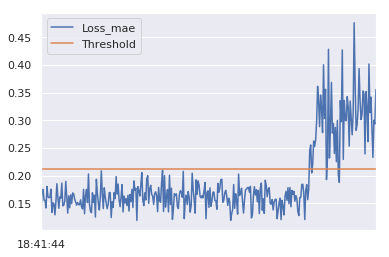

In [21]:
E_full.plot()

CPU times: user 610 ms, sys: 15.9 ms, total: 626 ms
Wall time: 641 ms


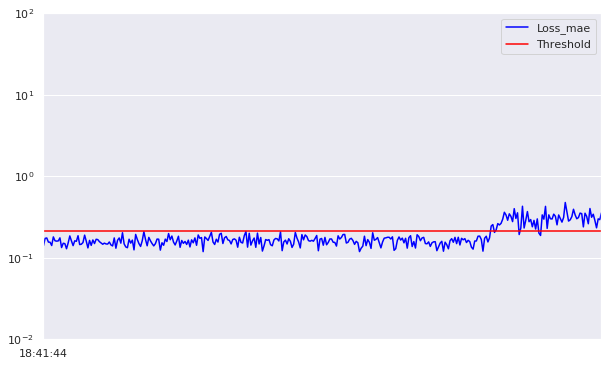

In [20]:
%%time

model, E_full, E_test = get_checker(X_train, X_test, checker.ad_paths, date=df_files[0]['date'])
model

In [66]:
E_t

,Loss_mae,Anomaly
2020-01-23 18:41:44.027200,0.633977,True
2020-01-23 18:41:44.027300,0.680330,True
2020-01-23 18:41:44.027400,0.530696,False
2020-01-23 18:41:44.027500,0.440004,False
2020-01-23 18:41:44.027600,0.431489,False
...,...,...
2020-01-23 18:41:44.033500,0.582715,False
2020-01-23 18:41:44.033600,0.530709,False
2020-01-23 18:41:44.033700,0.572694,False
2020-01-23 18:41:44.033800,0.574592,False


In [55]:
E_t

,Loss_mae,Anomaly
2020-01-23 18:41:44.027200,0.599659,False
2020-01-23 18:41:44.027300,0.693022,True
2020-01-23 18:41:44.027400,0.556028,False
2020-01-23 18:41:44.027500,0.449474,False
2020-01-23 18:41:44.027600,0.416113,False
...,...,...
2020-01-23 18:41:44.033500,0.569929,False
2020-01-23 18:41:44.033600,0.557185,False
2020-01-23 18:41:44.033700,0.551060,False
2020-01-23 18:41:44.033800,0.569985,False


In [23]:
path_model = "/home/guess/Desktop/autodeploy/examples/demo1/data-eng/ad-stuff/ad-checker/model"
ddae_model.save(path_model, save_format='tf')

INFO:tensorflow:Assets written to: /home/guess/Desktop/autodeploy/examples/demo1/data-eng/ad-stuff/ad-checker/model/assets


26-Jan-20 00:15:44 -  INFO - Assets written to: /home/guess/Desktop/autodeploy/examples/demo1/data-eng/ad-stuff/ad-checker/model/assets


In [53]:
new_model = tf.keras.models.load_model(path_model)
new_model

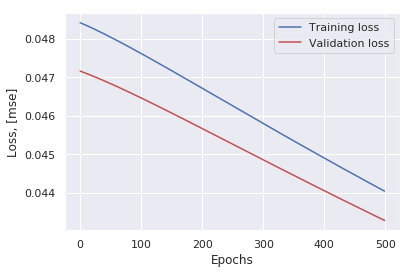

In [16]:
plot_training_error_history(ddae_history)

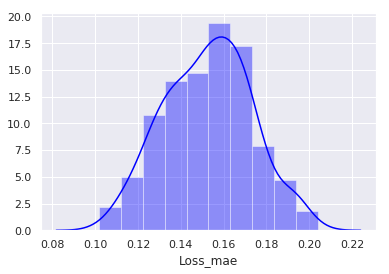

In [17]:
# Get Naive AE training loss
E_train = get_ddae_loss(ddae_model, X_train)

# Plot error distribution for naive model
plot_training_error_distribution(E_train['Loss_mae'])

In [54]:
NAIVE_THRESHOLD

0.21848932079062092

In [18]:
# Define Naive AE threshold
MAX_LOSS_MAE = E_train['Loss_mae'].max()
DELTA_LOSS = E_train['Loss_mae'].max()*0.01
NAIVE_THRESHOLD = MAX_LOSS_MAE + DELTA_LOSS

# Get Naive AE loss on test
E_test = get_ddae_loss(ddae_model, X_test)

# Detect anomaly
E_test['Anomaly'] = E_test['Loss_mae'] > NAIVE_THRESHOLD
E_test.head()

,Loss_mae,Anomaly
2020-01-23 18:41:44.027200,0.228658,True
2020-01-23 18:41:44.027300,0.249224,True
2020-01-23 18:41:44.027400,0.213889,True
2020-01-23 18:41:44.027500,0.220923,True
2020-01-23 18:41:44.027600,0.256853,True


### Predictions from drifted distribution

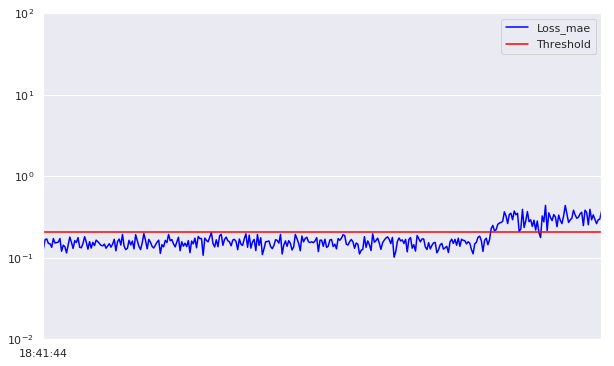

In [19]:
# Concat training and test datasets
E_full = pd.concat([E_train, E_test], sort=False)
E_full['Threshold'] = NAIVE_THRESHOLD
E_full.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red']);


# X_full.plot(figsize = (10,6), ylim = [1e-2,10])

### Predictions from sample distribution

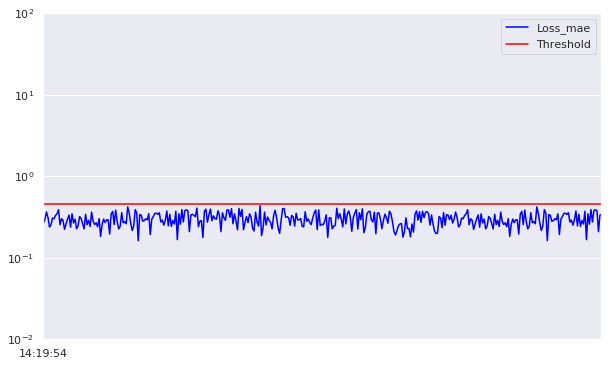

In [59]:
# Concat training and test datasets
E_full = pd.concat([E_train, E_test], sort=False)
E_full['Threshold'] = NAIVE_THRESHOLD
E_full.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red']);

# X_full.plot(figsize = (10,6), ylim = [1e-2,10])

In [10]:
from datetime import datetime, timedelta

td = timedelta(microseconds=1)
td

datetime.timedelta(microseconds=1)

In [25]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:]
now

'2020-01-15 15:49:38.776989'

In [ ]:
workflow1 = [
    {'name': 'gathering', 
     'file': 'gathering.py', 
     'parameters': {'raw_data_path': './leaf.csv',
                    'percentage': 1.0},
     'dockerfile': 'Dockerfile_gathering'}, 
    
    {'name': 'preprocessing',
     'file': 'preprocessing.py', 
     'requirements': 'req_preprocessing.txt'}, 

]


workflow2 = [
    {'name': 'modeling',
     'file': 'modeling.py', 
     'parameters': {'preprocessed_data': './preprocessed_data.csv',
                    'model_path': './models',
                    'n_estimators': 10},
     'requirements': 'req_modeling.txt'},
    
    {'name': 'modeling',
     'file': 'modeling.py', 
     'parameters': {'preprocessed_data': './preprocessed_data.csv',
                    'model_path': './models',
                    'n_estimators': 20},
     'requirements': 'req_modeling.txt'}, #     
]

workflows = [
    {'name': 'workflow1', 'workflow': workflow1, 
     'tracker': {'port': 8001}, 'parallel': False},
    {'name': 'workflow2', 'workflow': workflow2, 
     'tracker': {'port': 8002}, 'parallel': True} 
]